# Advanced statistical mechanics 8

## Two-dimensional Ising model

### Finite size scaling

a) In order to derive the finite size scaling relationship for $\chi$ we follow the arguments made in the lecture note.

At first we note that there is an infinite correlation length $\xi$ at the critical point.

For a system of finite size $L$ the correlation length $\xi_L$ is limitied by the system size $\xi_L\leq L$ on the one hand. On the other hand we need to recover the infinite size behaviour $\xi_L\xrightarrow{L\to\infty}1$.

Keeping this in mind, we can relate the correlation length for an infinite extended system $\xi$ with the correlation length of a finite size system $\xi_L$ by,
$$
\xi_L=\xi g_\xi\left(\frac{L}{\xi}\right),
$$
wherein $g_\xi$ has the asymptotic behaviour,
$$
g_\xi(x)=
\begin{cases}
\text{const},&x\gg1\\
x,&x\approx0
\end{cases}.
$$

From the lecture notes we know that $\xi\sim\vert t\vert^{-\nu}$ and $m\sim\vert t\vert^\beta$, therefore,
we can express the magnetisation in terms of the correlation length,
$$
m\sim \xi^{-\beta/\nu}.
$$
We know insert the relation between the finite- and infinite-size correlation length we derived earler and obtain,
$$
m_L\sim \xi^{-\beta/\nu}g_\xi\left(\frac{L}{\xi}\right)^{\beta/\nu}.
$$
We can simplify this expression by introducing the new function $g_m(x)$,
$$
m_L=\xi^{-\beta/\nu}g_m\left(\frac{L}{\xi}\right).
$$
For $L\to\infty$ we should recover the scaling law between magnetisation and correlation for an infinite-size system, $m\sim\xi^{-\beta/\nu}$, therefore we require that $g_m(x)\approx\text{const}$ for $x\gg1$. For $L\approx0$ we expect that the dependency on the correlation length vanishes, therefore $g(x)\approx x^{-\beta/\nu}$ for $x\ll1$. We could have arrived at the same required asymptoptic behaviour of $g_m$ if we would have considered our definition of $g_\xi$ and how it was related to $g_m$.

We now define,
$$
\tilde{m}(x):=x^\beta g_m(x^\nu),
$$
and solve for,
$$
g_m(x^\nu)=x^{-\beta}\tilde{m}(x).
$$
Substituting $x\to x^{1/\nu}$ we get,
$$
g_m(x)=x^{-\beta/\nu}\tilde{m}\left(x^{1/\nu}\right).
$$

We insert this into our equation for $m_L$, yielding,
$$
m_L=\xi^{-\beta/\nu}\left(\frac{L}{\xi}\right)^{-\beta/\nu}\tilde{m}\left(L^{1/\nu}\xi^{-1/\nu}\right)=L^{-\beta/\nu}\overline{m}\left(L^{1/\nu}t\right),
$$
wherein we used the scaling between the reduced temperature and the correlation length in the last step.
Solving now for $\overline{m}$ we find,
$$
\overline{m}\left(L^{1/\nu}t\right)=m_LL^{\beta/\nu}.
$$

In [12]:
import os
import subprocess
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

plt.style.use("bodo")

In [48]:
NUM_TOTAL_STEPS = 500000
NUM_BURNIN_STEPS = 400000

if not os.path.exists("../data"):
    os.makedirs("../data")

L = 2**np.arange(3, 7)
T = np.arange(1.5, 3.52, 0.02)

def filename(l, t):
  return f"../data/lattice_{l:.0f}x{l:.0f}_temperature{t:.2f}.csv"
    
for l in L:
    for t in T:
        with open(filename(l, t), "w") as file:
            subprocess.call([
              "../target/debug/ising",
              f"--size={l}",
              f"--temperature={t}",
              f"--total-steps={NUM_TOTAL_STEPS}",
              f"--burnin-steps={NUM_BURNIN_STEPS}"
            ], stdout=file)
        
    print(f"completed simulation of {l:.0f}x{l:.0f} lattice")

completed simulation of 8x8 lattice
completed simulation of 16x16 lattice
completed simulation of 32x32 lattice
completed simulation of 64x64 lattice


In [49]:
data = {l: {t: pd.read_csv(f"../data/{filename(l, t)}") for t in T} for l in L}

In [62]:
suscep = {l: [df["susceptibility"].mean() for df in dfs.values()] for (l, dfs) in data.items()}
absmag = {l: [df["absolute magnetisation"].mean() for df in dfs.values()] for (l, dfs) in data.items()}
mag = {l: [df["magnetisation"].mean() for df in dfs.values()] for (l, dfs) in data.items()}

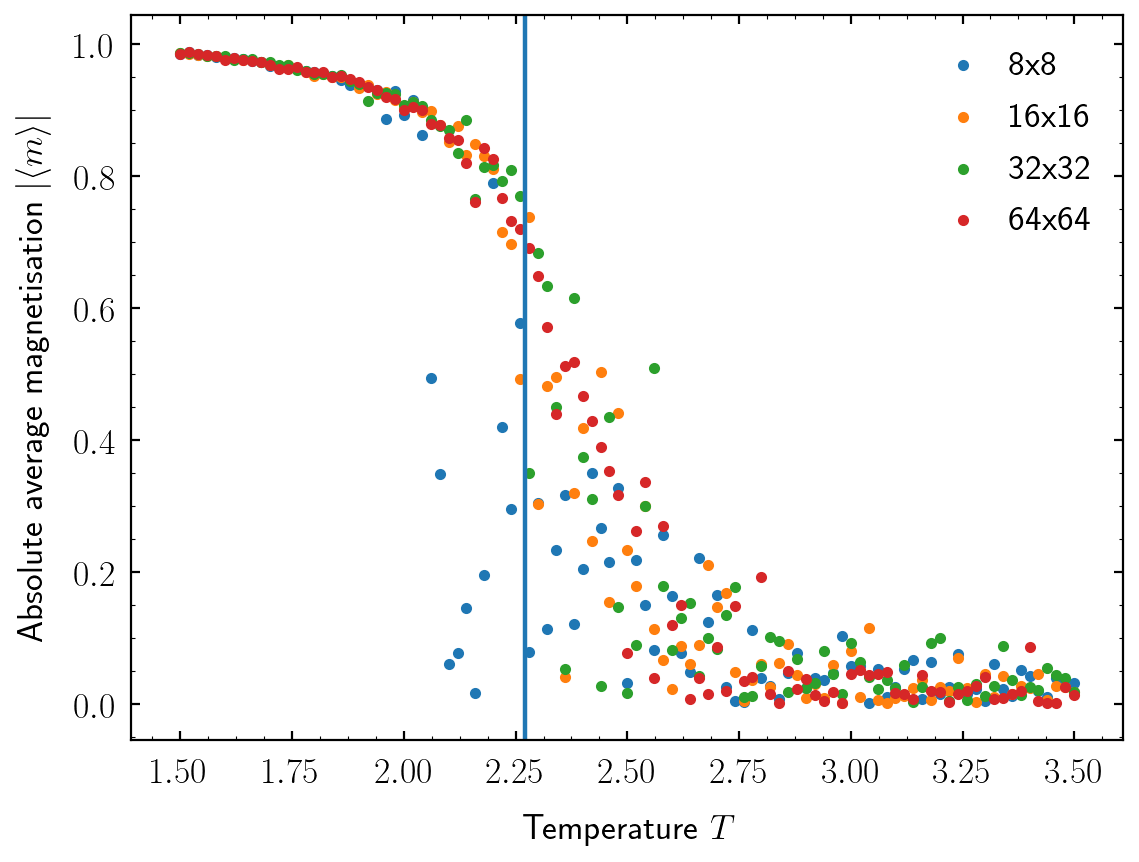

In [72]:
fig, axis = plt.subplots(figsize=(8, 6))

axis.set_xlabel(r"Temperature $T$")
axis.set_ylabel(r"Absolute average magnetisation $\vert\langle m\rangle\vert$")

for (l, m) in mag.items():
    axis.scatter(T, np.abs(m) / l**2, label=f"{l}x{l}")

axis.axvline(2.27, 0, +1)

plt.legend()
plt.show()

Inspecting the absolute average magnetisation for various system sizes and temperatures, we observe a phase transition from an ordered $\vert\langle m\rangle\vert=1$ to an unordered $\langle m\rangle=0$ state at the critical temperature $T_c\approx2.27$.

In addition to the phase transition, we note a reduction in variance with increase of the lattice size.

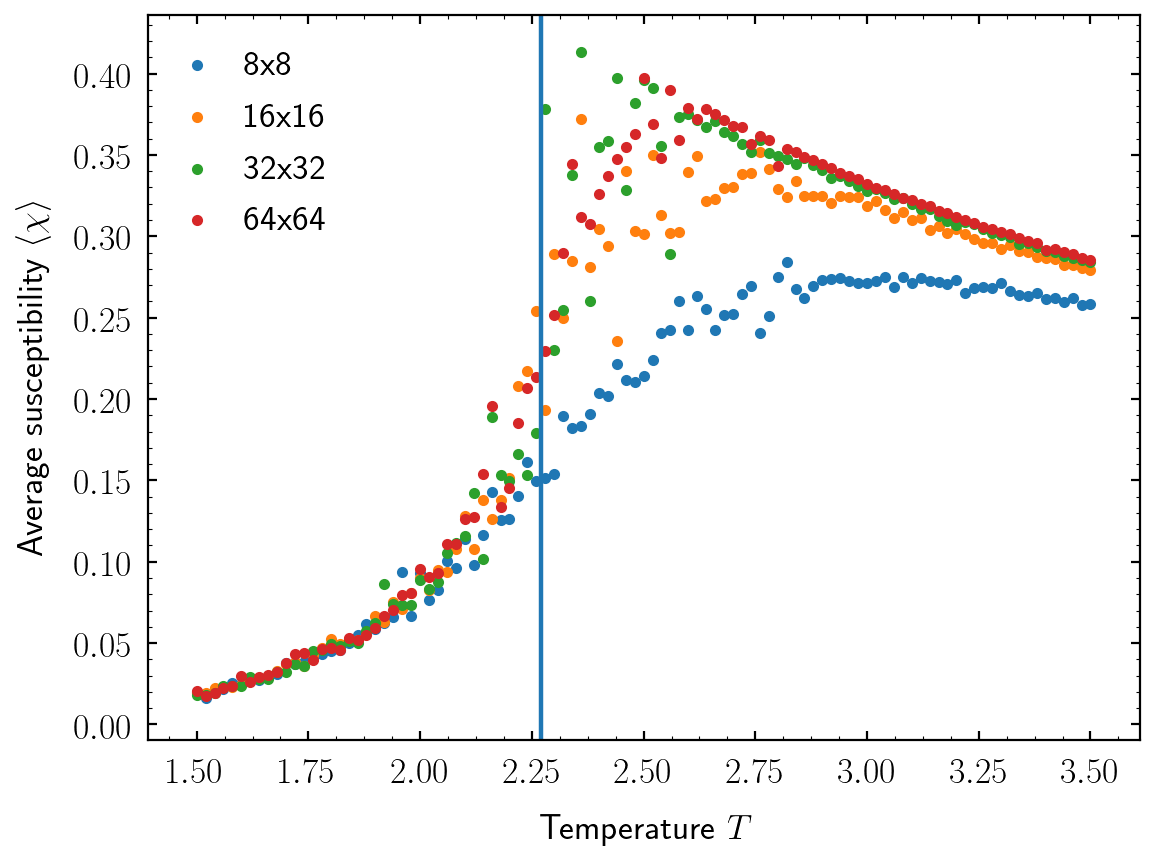

In [70]:
fig, axis = plt.subplots(figsize=(8, 6))

axis.set_xlabel(r"Temperature $T$")
axis.set_ylabel(r"Average susceptibility $\langle\chi\rangle$")

for (l, chi) in suscep.items():
    axis.scatter(T, chi, label=f"{l}x{l}")
    
axis.axvline(2.27, -1, +1)
    
plt.legend()
plt.show()

In the above plot we can see how the average susceptibility $\langle\chi\rangle$ increases fast near the critical temperature (blue line) and then slighlty decreases thereafter.

We also observe that the susceptibility near the critical temperature increases more the larger the system size.

Actually, we would expect the susceptibility to peak exactly at the critical temperature $T_c\approx2.26$ (blue line), yet it appears that the peak is closer to $T\approx2.5$.

**We don't know how to read this result.**

In [84]:
Tc = 2 / np.log(1 + np.sqrt(2))

t = np.abs(T - Tc) / Tc

nu = 1
gamma = 7/4
beta = 1/8

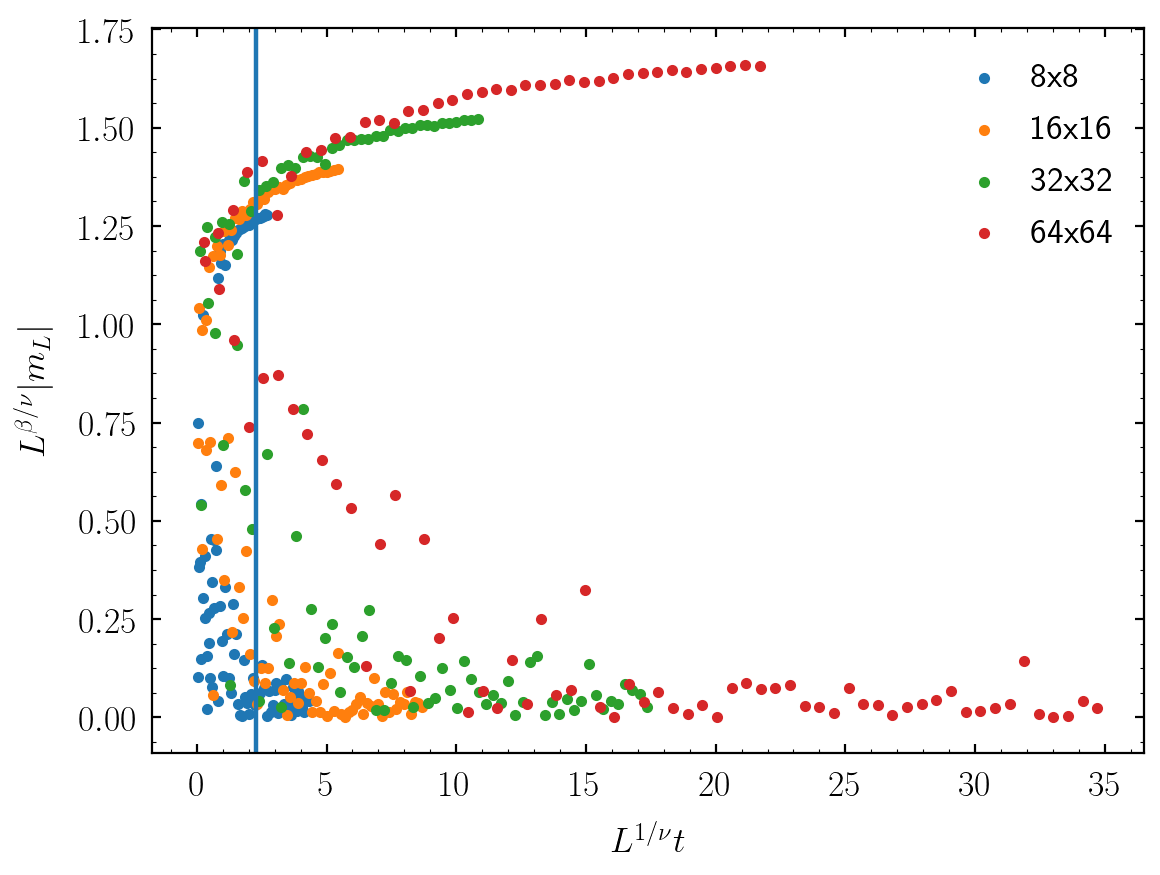

In [100]:
fig, axis = plt.subplots(figsize=(8, 6))

axis.set_xlabel(r"$L^{1/\nu}t$")
axis.set_ylabel(r"$L^{\beta/\nu}\vert m_L\vert$")

for (l, m) in mag.items():
    axis.scatter(t*l**(1/nu), np.abs(m)*l**(beta/nu)/l**2, label=f"{l}x{l}")
    
axis.axvline(2.27, -1, +1)
    
plt.legend()
plt.show()

For $L^{\beta/\nu}\vert m_L\vert>1$ the scatter points collapse close to another otherwise the points seem to have a large spread in the lower half of the diagram.

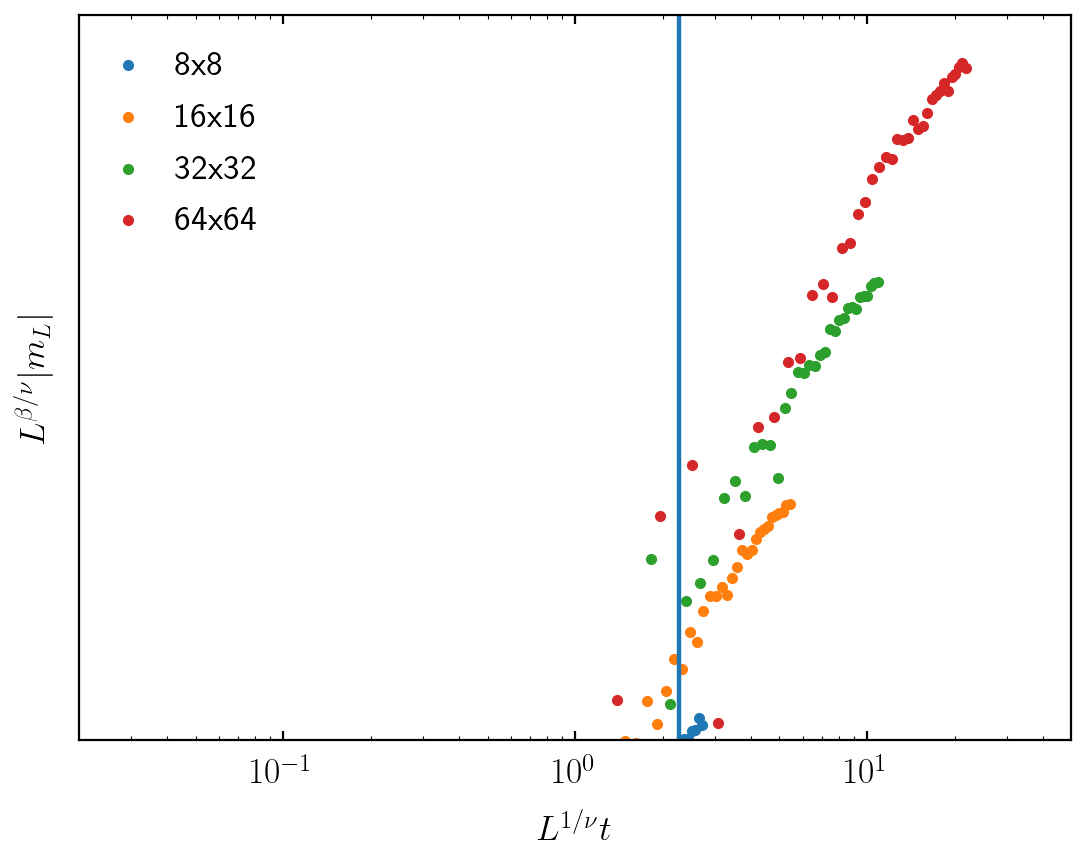

In [101]:
fig, axis = plt.subplots(figsize=(8, 6))

axis.set_xlabel(r"$L^{1/\nu}t$")
axis.set_ylabel(r"$L^{\beta/\nu}\vert m_L\vert$")

for (l, m) in mag.items():
    axis.scatter(t*l**(1/nu), np.abs(m)*l**(beta/nu)/l**2, label=f"{l}x{l}")
    
axis.axvline(2.27, -1, +1)

axis.set_xscale("log")
axis.set_yscale("log")
    
plt.legend()
plt.show()

Using a log-log plot we can reduce the spread between the data points and the data points appear to collapse on a line.

For the small lattice parameter $L=8$ the scaling does not work well.

FOr the other lattice parameters we see that they have the same slope in the log-log representation but a different offset which seems to increase with the lattice size.

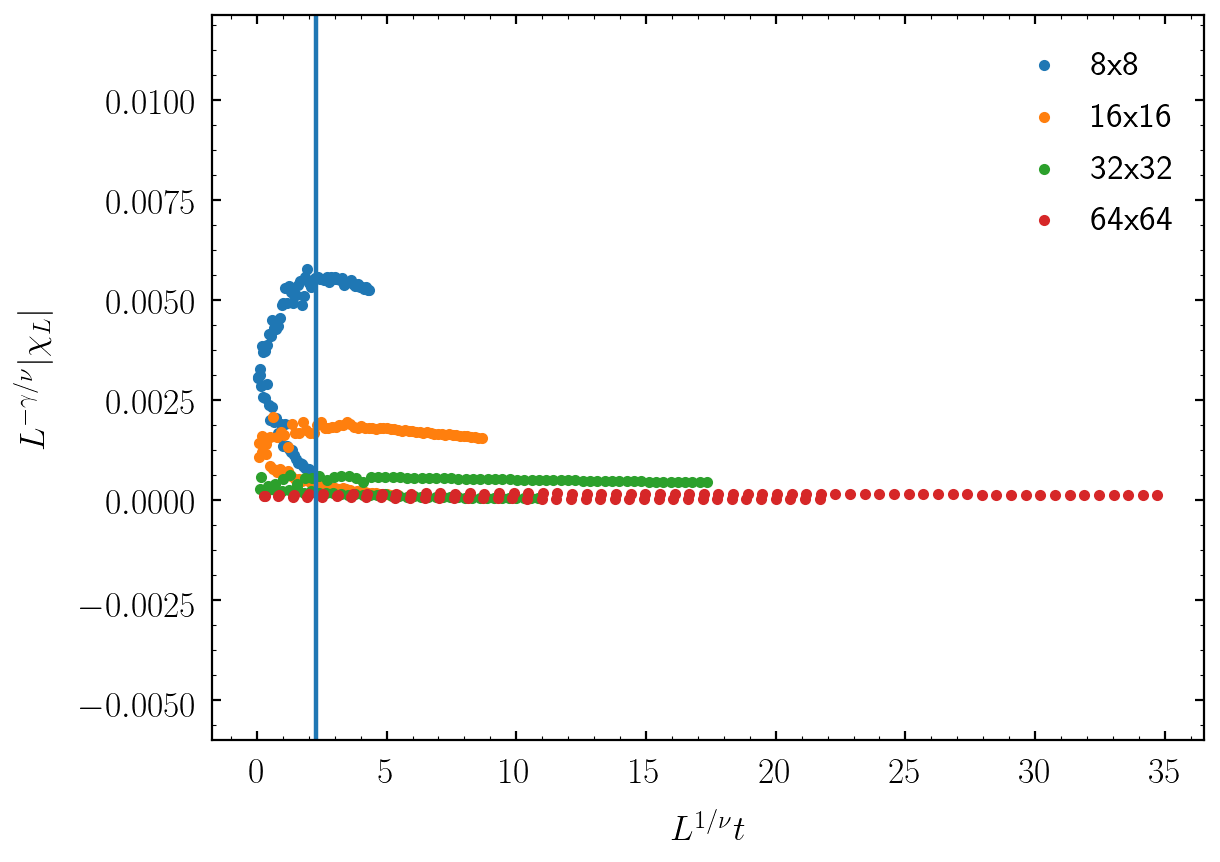

In [102]:
fig, axis = plt.subplots(figsize=(8, 6))

axis.set_xlabel(r"$L^{1/\nu}t$")
axis.set_ylabel(r"$L^{-\gamma/\nu}\vert \chi_L\vert$")

for (l, chi) in suscep.items():
    axis.scatter(t*l**(1/nu), np.abs(chi)*l**(beta/nu)/l**2, label=f"{l}x{l}")
    
axis.axvline(2.27, -1, +1)
    
plt.legend()
plt.show()

Here we observe that the susceptibility quickly approaches zero for lattices sizes larger than $16$.

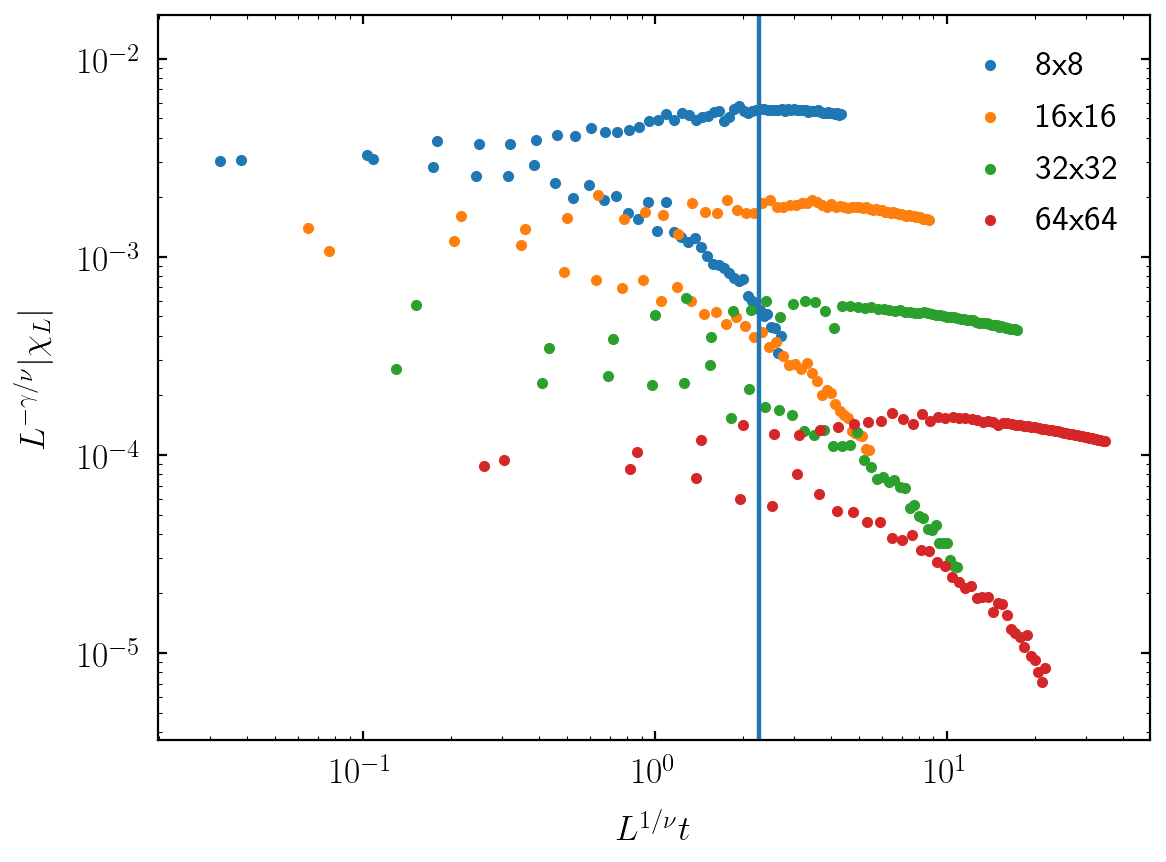

In [104]:
fig, axis = plt.subplots(figsize=(8, 6))

axis.set_xlabel(r"$L^{1/\nu}t$")
axis.set_ylabel(r"$L^{-\gamma/\nu}\vert \chi_L\vert$")

for (l, chi) in suscep.items():
    axis.scatter(t*l**(1/nu), np.abs(chi)*l**(beta/nu)/l**2, label=f"{l}x{l}")
    
axis.axvline(2.27, -1, +1)
    
axis.set_xscale("log")
axis.set_yscale("log")
  
plt.legend()
plt.show()

> For which values of t does the collaps work best and why is this expected?

Well, actually the collapse does not work good at all :D.

I would expect that the collapse is best close to the critical point, that is where $t\ll1$, however, in our case there are not much data points in this region and the ones we have do not look close at all...